In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [5]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","dummy","eco2","etvoc","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mg811","mh-z14a","notice","s8lp","scd30","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [6]:
sensores = ["scd30"]
datos = pd.concat([tb.get_df(key=sensor,
                             start_datetime="2021-10-25",
                             end_datetime=  "2021-11-05") for sensor in sensores],axis=1)
datos.index = datos.index + pd.Timedelta("-5H")

<AxesSubplot:xlabel='ts'>

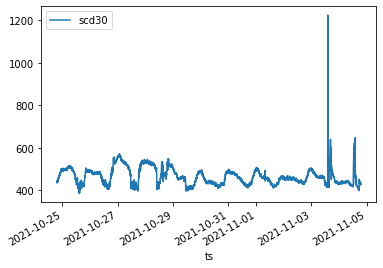

In [7]:
datos.plot()

In [8]:
datos.to_csv("../data/002_processed/scd30.csv")

In [10]:
scd30   = pd.read_csv('../data/002_processed/scd30.csv',index_col=0,parse_dates=True)


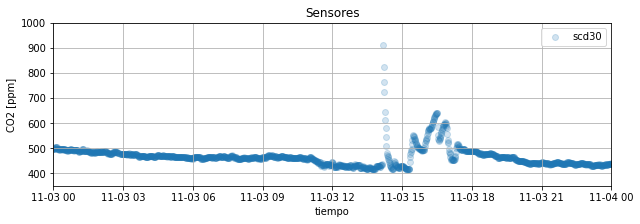

In [13]:

fig, ax = plt.subplots(figsize=(10,3))

fecha1 = parse("2021-11-03") 
fecha2 = fecha1 + pd.Timedelta("1D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(350,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()


ax.scatter(scd30.index,scd30,label='scd30',alpha=0.2)

ax.legend()

